In [1]:
import random
import cv2
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import os

Load the image

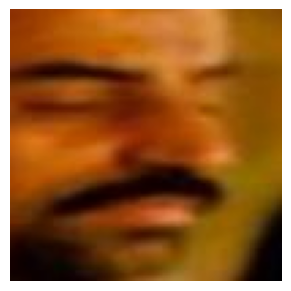

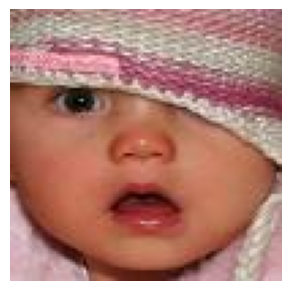

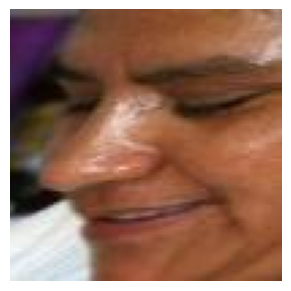

In [2]:
image_path=glob('DATASET/train/**/*')
for i in range(3):
    image=random.choice(image_path)
    img=cv2.imread(image)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

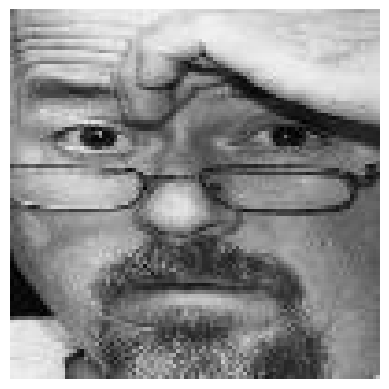

In [3]:
img1=cv2.imread('DATASET/train/1/train_00043_aligned.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

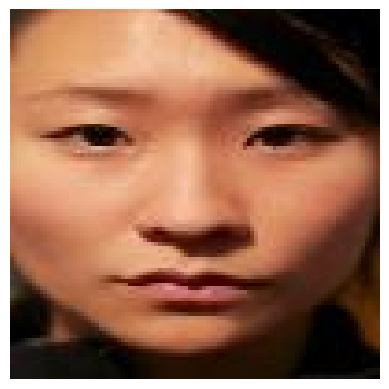

In [4]:
img1=cv2.imread('DATASET/train/7/train_09750_aligned.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

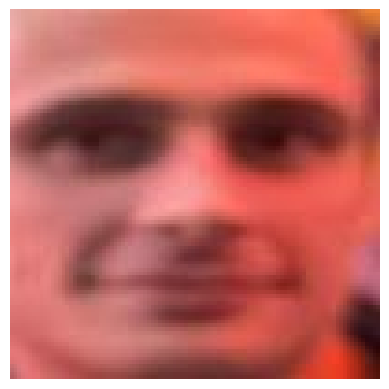

In [5]:
img1=cv2.imread('DATASET/train/4/train_00008_aligned.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

In [6]:
image_count_train=len(glob('DATASET/train/**/*'))
image_count_train

12271

In [7]:
image_count_test=len(glob('DATASET/test/**/*'))
image_count_test

3068

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
img_Size=48
batch_size=64
Datagen_train=ImageDataGenerator(horizontal_flip=True)

                                 
                                 


train_generator=Datagen_train.flow_from_directory('DATASET/train/',
                                                  target_size=(img_Size,img_Size),
                                                  batch_size=batch_size ,
                                                  color_mode='grayscale',
                                                  shuffle=True,
                                                  class_mode='categorical')

Found 12271 images belonging to 7 classes.


In [24]:
Datagen_test=ImageDataGenerator()
validation_generator=Datagen_test.flow_from_directory('DATASET/test/',
                                                     target_size=(img_Size,img_Size),
                                                     batch_size=batch_size,
                                                     color_mode='grayscale',
                                                     class_mode='categorical',
                                                     shuffle=True)

Found 3068 images belonging to 7 classes.


In [25]:
class_label=['Surprise','Fear','Disgust',"Happiness","Sadness","Anger","Neutral"]

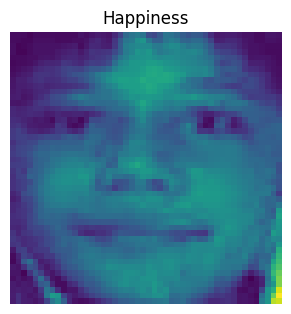

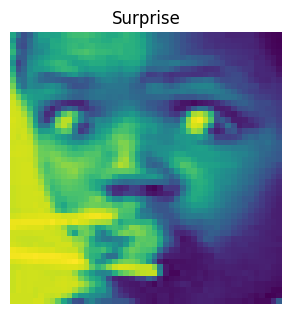

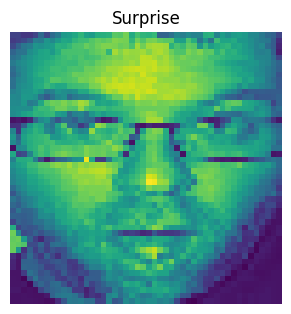

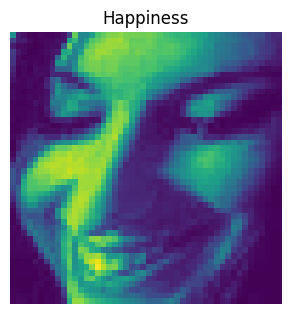

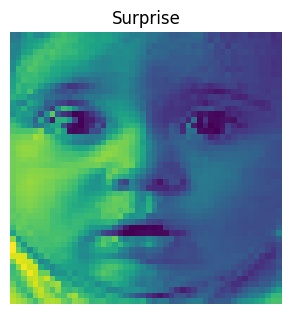

In [26]:
import numpy as np
images, labels = next(train_generator)  
for i in range(5):
    plt.figure(figsize=(12,12))
    plt.subplot(331 + i)
    plt.imshow(images[i])
    plt.title(class_label[np.argmax(labels[i])])
    plt.axis("off")
    plt.show()


Train the model


In [27]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


In [28]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [29]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [30]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [31]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [32]:
epochs = 50
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [33]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/50


C:\Users\Welcome\anaconda3\envs\emotion_detection_courses\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.4460 - loss: 1.5673
Epoch 1: saving model to model_weights.weights.h5
191/191 ━━━━━━━━━━━━━━━━━━━━ 106s 480ms/step - accuracy: 0.4463 - loss: 1.5662 - val_accuracy: 0.6027 - val_loss: 1.0848
Epoch 2/50
  1/191 ━━━━━━━━━━━━━━━━━━━━ 54s 285ms/step - accuracy: 0.5312 - loss: 1.2621
Epoch 2: saving model to model_weights.weights.h5


C:\Users\Welcome\anaconda3\envs\emotion_detection_courses\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 1.2621 - val_accuracy: 0.6833 - val_loss: 0.9263
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.6145 - loss: 1.0721
Epoch 3: saving model to model_weights.weights.h5
191/191 ━━━━━━━━━━━━━━━━━━━━ 82s 426ms/step - accuracy: 0.6145 - loss: 1.0720 - val_accuracy: 0.6769 - val_loss: 0.8971
Epoch 4/50
  1/191 ━━━━━━━━━━━━━━━━━━━━ 1:13 384ms/step - accuracy: 0.7500 - loss: 0.8397
Epoch 4: saving model to model_weights.weights.h5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.8397 - val_accuracy: 0.7167 - val_loss: 0.7757
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.6708 - loss: 0.9137
Epoch 5: saving model to model_weights.weights.h5
191/191 ━━━━━━━━━━━━━━━━━━━━ 91s 471ms/step - accuracy: 0.6708 - loss: 0.9137 - val_accuracy: 0.6516 - val_loss: 0.9428
Epoch 6/50
  1/191 ━━━━━━━━━━━━━━━━━━━━ 1:31 481ms/step - accuracy: 0.7188 - loss: 0.7933
Epoch 6: saving mode

In [34]:
model.evaluate(validation_generator)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.7365 - loss: 0.7953


[0.7498993277549744, 0.7490221858024597]

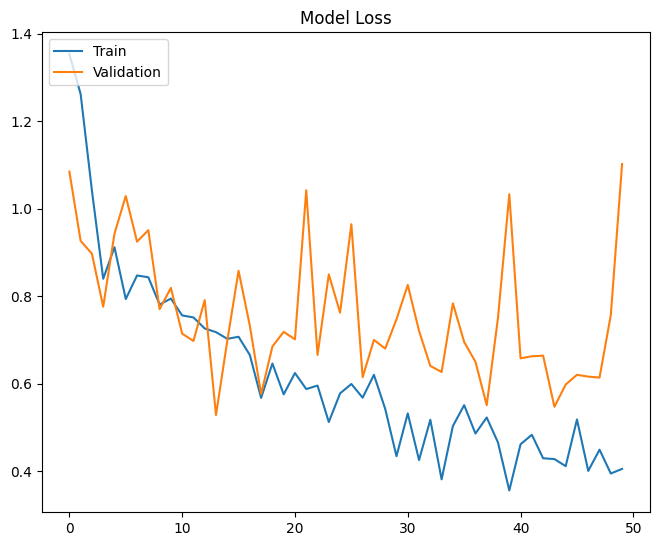

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

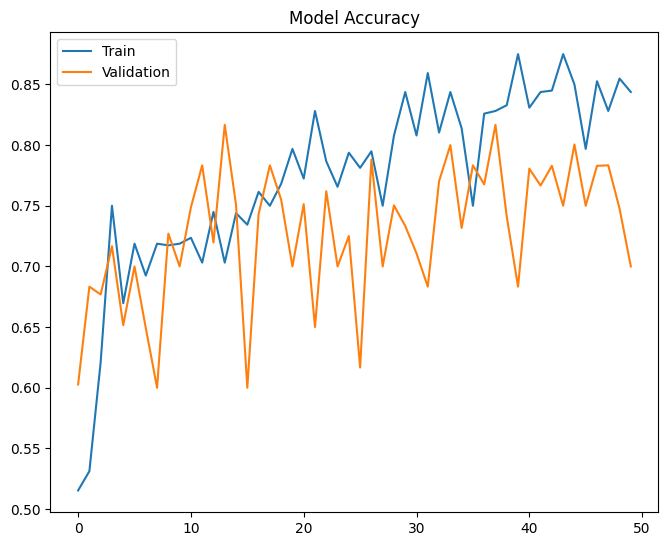

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [37]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)